In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/big_data_final/train_labels.csv'

# Read the CSV file into a pandas DataFrame
labels = pd.read_csv(csv_file_path)

# Print the DataFrame
print(labels)


Mounted at /content/drive
                   session_id  correct
0        20090312431273200_q1        1
1        20090312433251036_q1        0
2        20090312455206810_q1        1
3        20090313091715820_q1        0
4        20090313571836404_q1        1
...                       ...      ...
424111  22100215342220508_q18        1
424112  22100215460321130_q18        1
424113  22100217104993650_q18        1
424114  22100219442786200_q18        1
424115  22100221145014656_q18        1

[424116 rows x 2 columns]


In [3]:
# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/big_data_final/test.csv'

# Read the CSV file into a pandas DataFrame
test = pd.read_csv(csv_file_path)

# Print the DataFrame
print(test)

             session_id  index  elapsed_time      event_name       name  \
0     20090109393214576      0             0  cutscene_click      basic   
1     20090109393214576      1          1965    person_click      basic   
2     20090109393214576      2          3614    person_click      basic   
3     20090109393214576      3          5330    person_click      basic   
4     20090109393214576      4          6397    person_click      basic   
...                 ...    ...           ...             ...        ...   
3723  20090312331414616   1001       1581679       map_hover      basic   
3724  20090312331414616   1002       1583044       map_hover      basic   
3725  20090312331414616   1003       1583410       map_click  undefined   
3726  20090312331414616   1004       1585841  navigate_click  undefined   
3727  20090312331414616   1005       1587810      checkpoint      basic   

      level  page  room_coor_x  room_coor_y  screen_coor_x  ...  \
0         0   NaN  -413.991405  

In [9]:
import tensorflow as tf


In [8]:
import tensorflow_addons as tfa
import tensorflow_decision_forests as tfdf


import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.7 MB/s eta 0:00:00


In [7]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 24.7 MB/s eta 0:00:00


In [10]:
import numpy as np

In [11]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}


# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/big_data_final/train.csv'

# Read the CSV file into a pandas DataFrame
train = pd.read_csv(csv_file_path, dtype = dtypes)

# Print the DataFrame
print(train)


                 session_id  index  elapsed_time      event_name       name  \
0         20090312431273200      0             0  cutscene_click      basic   
1         20090312431273200      1          1323    person_click      basic   
2         20090312431273200      2           831    person_click      basic   
3         20090312431273200      3          1147    person_click      basic   
4         20090312431273200      4          1863    person_click      basic   
...                     ...    ...           ...             ...        ...   
26296941  22100221145014656   1600       5483231  navigate_click  undefined   
26296942  22100221145014656   1601       5485166  navigate_click  undefined   
26296943  22100221145014656   1602       5485917  navigate_click  undefined   
26296944  22100221145014656   1603       5486753  navigate_click  undefined   
26296945  22100221145014656   1604       5487952      checkpoint      basic   

          level  page  room_coor_x  room_coor_y  sc

In [12]:
train.shape

(26296946, 20)

In [13]:
pd.set_option('display.max_column', 20)

In [14]:
train.head(10)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991394,-157.314682,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485077,-199.971680,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355133,-168.619919,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733429,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048035,-153.743637,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [15]:
labels

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


IN LABELS DATASET, Each value in the column, session_id is a combination of both the session and the question number. We will split these into individual columns for ease of use.

In [16]:
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [17]:
labels

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1
...,...,...,...,...
424111,22100215342220508_q18,1,22100215342220508,18
424112,22100215460321130_q18,1,22100215460321130,18
424113,22100217104993650_q18,1,22100217104993650,18
424114,22100219442786200_q18,1,22100219442786200,18


In [18]:
labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


Our goal is to train models for each question to predict the label correct for any input user session.


<Axes: >

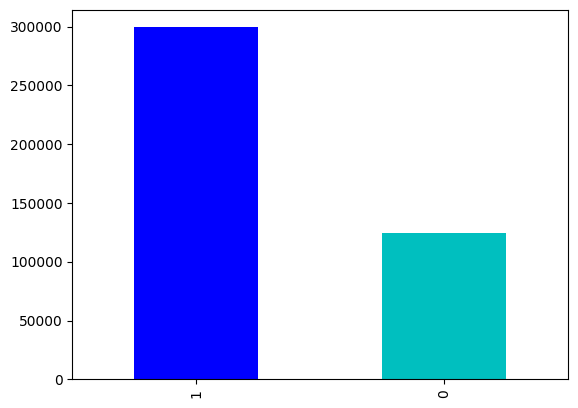

In [19]:
labels['correct'].value_counts().plot(kind="bar", color=['b', 'c'])

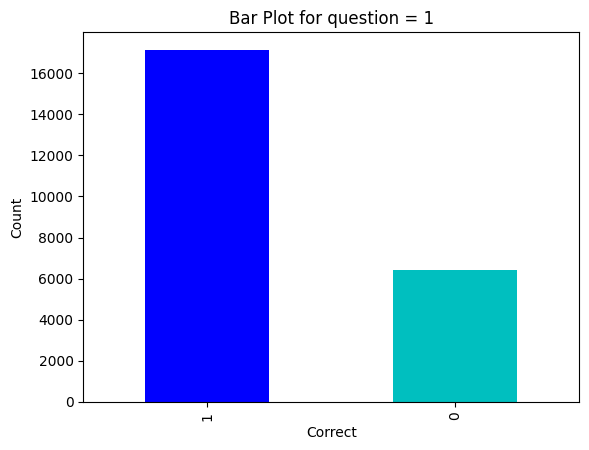

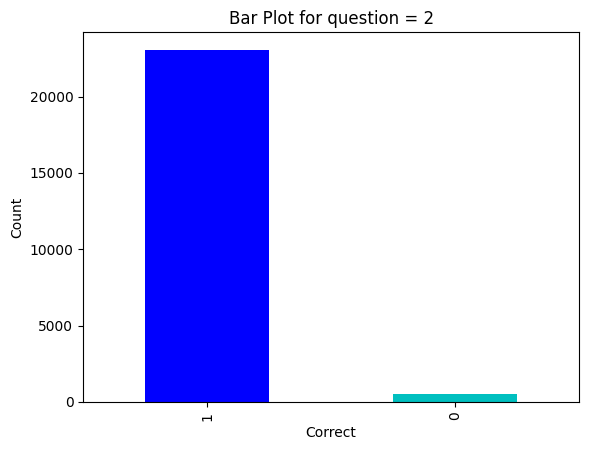

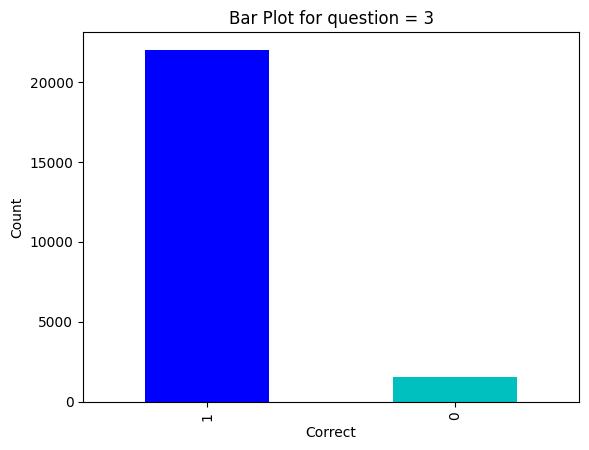

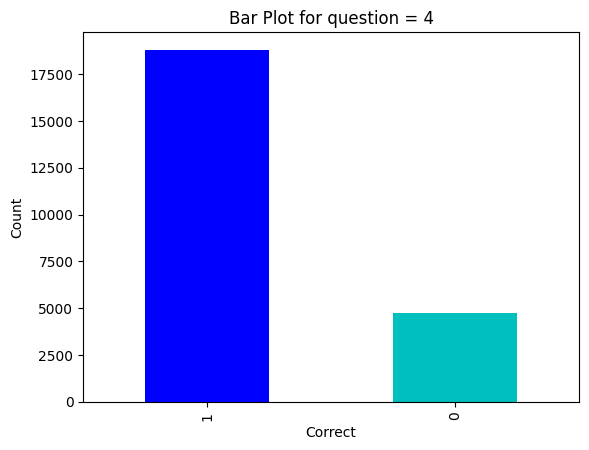

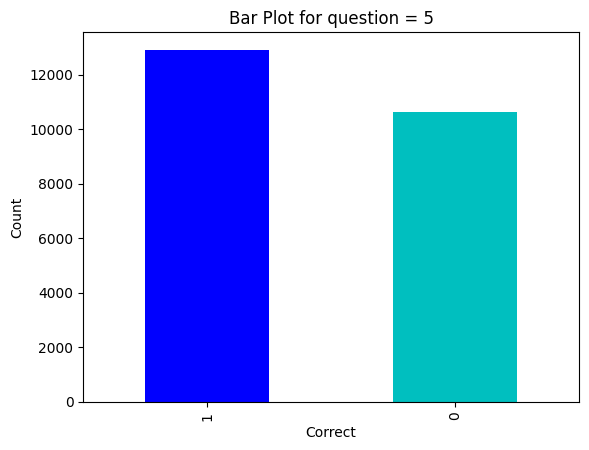

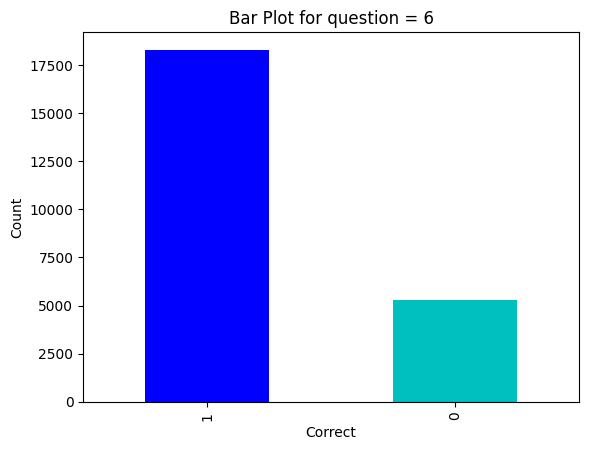

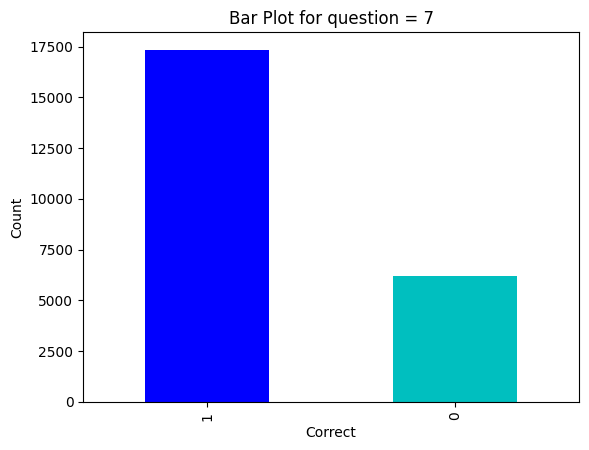

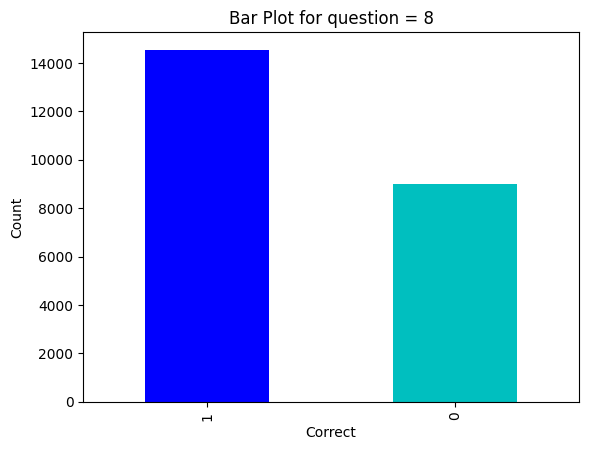

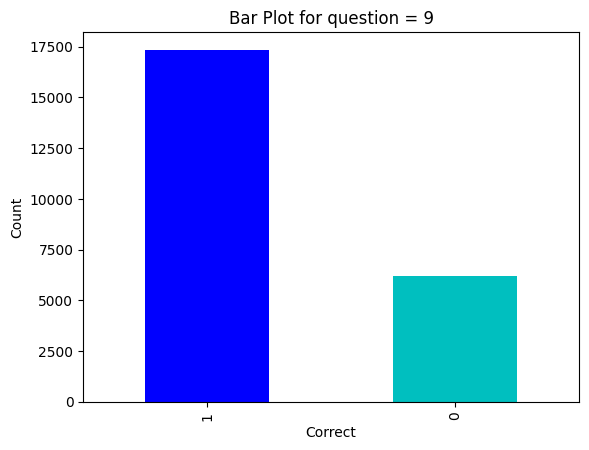

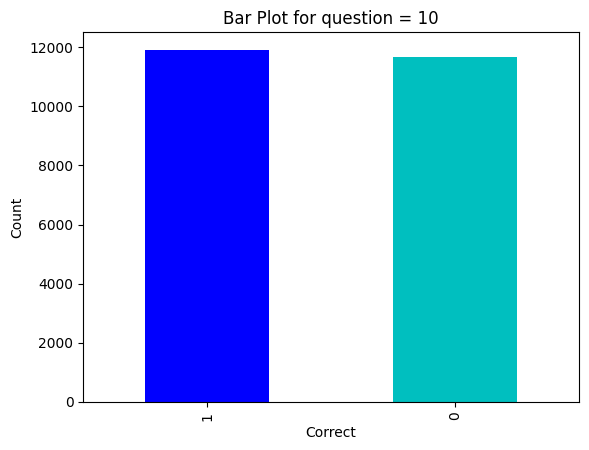

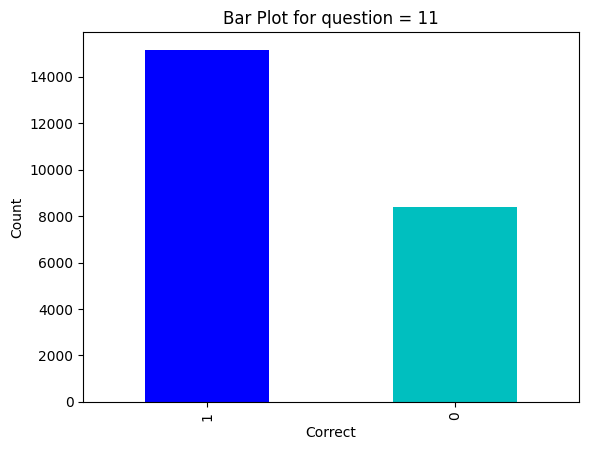

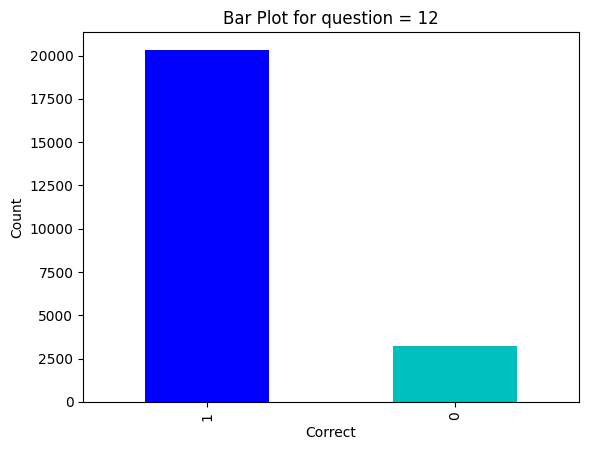

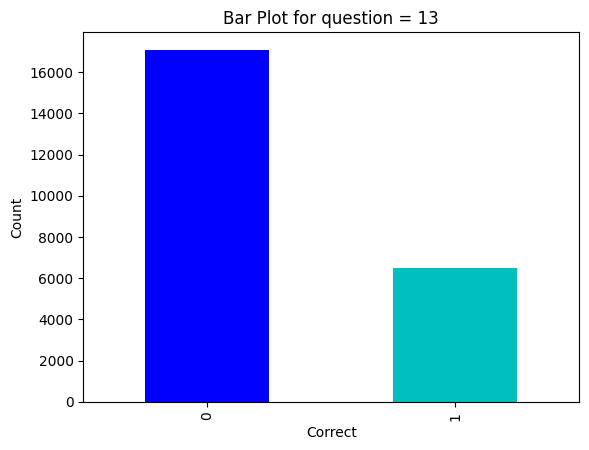

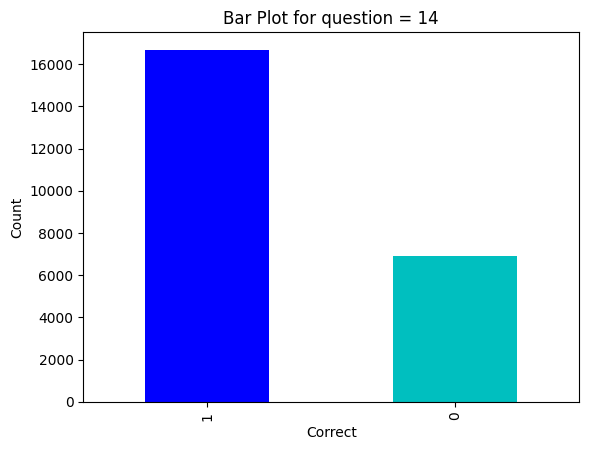

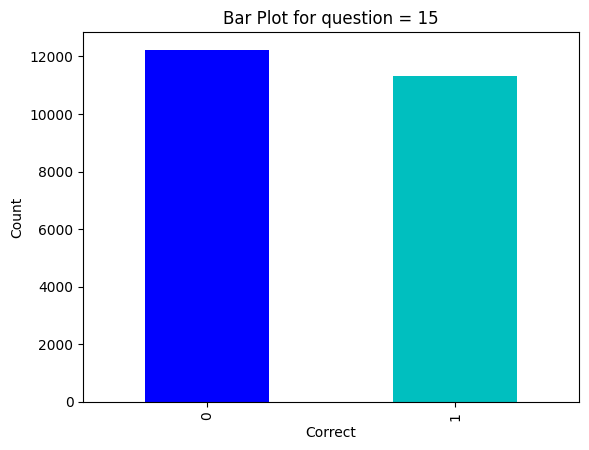

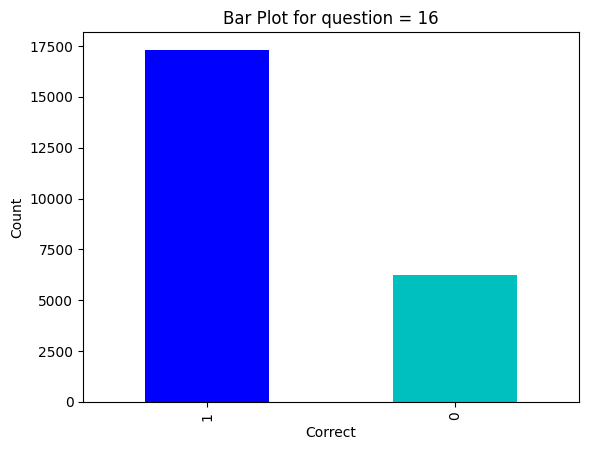

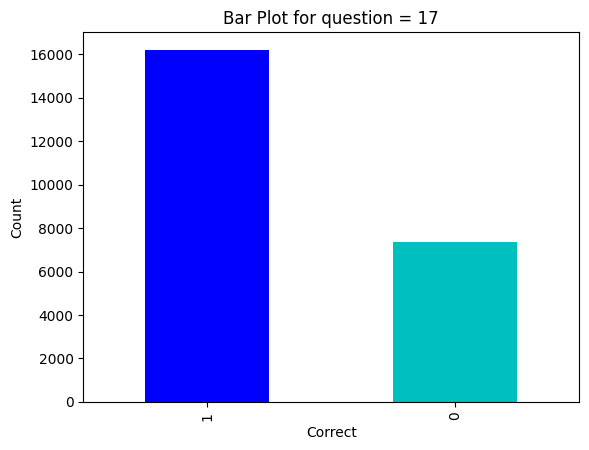

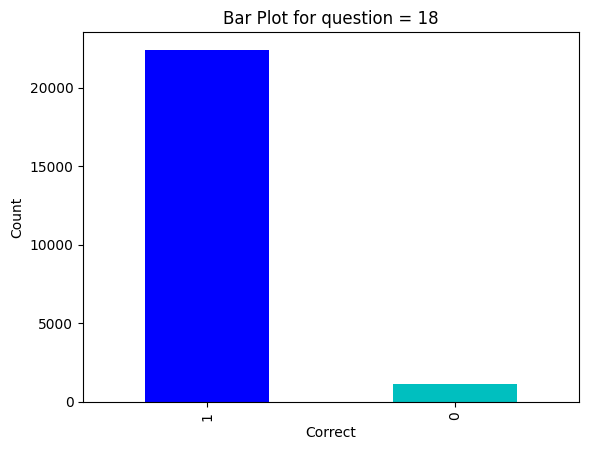

In [20]:
import matplotlib.pyplot as plt

for i in range(0, 19):
    df = labels.loc[labels['q'] == i]
    
    if not df.empty:
        counts = df['correct'].value_counts()
        counts.plot(kind='bar', color=['b', 'c'])
        plt.title(f'Bar Plot for question = {i}')
        plt.xlabel('Correct')
        plt.ylabel('Count')
        plt.show()


In [21]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

we create two separate lists with names of the Categorical columns and Numerical columns. We will avoid columns fullscreen, hq and music since they don't add any useful value for this problem statement.

In [22]:
def feature_engineer(train):
    dfs = []
    for c in CATEGORICAL:
        tmp = train.groupby(['session_id','level_group'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = train.groupby(['session_id','level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = train.groupby(['session_id','level_group'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    train = pd.concat(dfs,axis=1)
    train = train.fillna(-1)
    train = train.reset_index()
    train =  train.set_index('session_id')
    return train

In [23]:
train = feature_engineer(train)

In [24]:
train.shape

(70686, 22)

In [25]:
train

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.000000,7.701275,...,383.044861,2389.500000,4.924654e+04,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.000000,-130.347168,...,379.301025,899.925903,1.266661e+05,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.000000,14.306062,...,378.784912,969.333313,8.017568e+04,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.000000,-84.045959,...,370.723083,1378.750000,6.737271e+04,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.100000,-30.762283,...,387.930084,720.384949,7.773825e+05,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,13-22,11,4,49,12,33,9.619192e+05,17.671395,5.230769,-158.599121,...,444.510040,1110.500000,1.516019e+05,2.359474,0.908083,589.562720,273.090325,248.584999,134.772721,1675.299532
22100219442786200,5-12,11,6,41,11,20,3.866058e+05,8.111511,1.833333,-2.569204,...,414.301208,1328.250000,9.665042e+04,2.180934,0.923548,390.345335,147.579436,250.827193,135.693654,1910.823123
22100221145014656,0-4,11,4,27,7,17,2.036104e+05,2.061611,0.333333,-1.339606,...,358.964813,4164.636230,1.085422e+05,1.276526,0.516398,392.539487,159.619091,213.638122,128.499750,6725.520698


In [26]:
train.index

Int64Index([20090312431273200, 20090312431273200, 20090312431273200,
            20090312433251036, 20090312433251036, 20090312433251036,
            20090312455206810, 20090312455206810, 20090312455206810,
            20090313091715820,
            ...
            22100215460321130, 22100217104993650, 22100217104993650,
            22100217104993650, 22100219442786200, 22100219442786200,
            22100219442786200, 22100221145014656, 22100221145014656,
            22100221145014656],
           dtype='int64', name='session_id', length=70686)

In [27]:
train.index.nunique()

23562

The provided explanation is a breakdown of the steps involved in the `feature_engineer` function for both categorical and numerical columns. Let's elaborate on each step:

1. For categorical columns:
   - The dataset is grouped by 'session_id' and 'level_group'. This means that the data is divided into separate groups based on unique combinations of 'session_id' and 'level_group'.
   - For each group, the number of distinct elements in the categorical column is counted using the `nunique()` function. This gives the count of unique values in the column within each group.
   - The resulting Series, representing the count of unique values, is temporarily stored.

2. For numerical columns:
   - Similar to categorical columns, the dataset is grouped by 'session_id' and 'level_group'.
   - Instead of counting distinct elements, the mean and standard deviation of the numerical column are calculated within each group using the `mean()` and `std()` functions, respectively.
   - Separate Series are generated for the mean and standard deviation, and they are temporarily stored.

3. After processing all the categorical and numerical columns, the temporary Series generated for each column are concatenated along the column axis (`axis=1`) using `pd.concat()`. This combines all the temporary Series into a single DataFrame.
   
By following these steps, the function creates a new DataFrame where each row represents a unique combination of 'session_id' and 'level_group', and the columns contain the engineered features derived from the original dataset. The categorical features are represented by the count of unique values within each group, while the numerical features are represented by the mean and standard deviation within each group. This new feature-engineered dataset can be used for further analysis or as input for machine learning models.

EXPLANATION FOR FEATURE ENGINEERING - it seems that a session ID represents a unique student or player, and they may participate in multiple sessions or play the same level group multiple times.

By grouping the dataset by both 'session_id' and 'level_group', you are creating subsets of data that correspond to each unique combination of a student's session and the level group they played. This allows you to analyze and extract specific information related to each student's performance within a particular level group.

For example, if a student played the same level group multiple times, the feature engineering process can capture various aspects of their performance within that group, such as the count of unique categories they encountered or the average and variability of numerical features like duration.

By considering the specific combination of session ID and level group, you can generate more granular and informative features that may help in understanding the patterns, trends, or behavior of individual students within each level group.

# Model Selecetion



GradientBoostedTreesModel



In [28]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

# A Gradient Boosted Decision Tree

In [29]:
rf = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpeqq4j89x as temporary training directory


# Training


In [30]:
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - 0.20))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

56547 examples in training, 14139 examples in testing.


In [31]:
train_x

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.000000,7.701275,...,383.044861,2389.500000,49246.539458,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.000000,-130.347168,...,379.301025,899.925903,126666.129584,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.000000,14.306062,...,378.784912,969.333313,80175.676658,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.000000,-84.045959,...,370.723083,1378.750000,67372.714092,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.100000,-30.762283,...,387.930084,720.384949,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000319145510864,13-22,11,4,49,12,32,1.529103e+06,17.958549,5.200000,-157.270508,...,386.713501,1655.199951,263414.326692,2.157711,0.788811,627.541091,279.442752,245.584051,119.774361,3955.627623
22000319145510864,5-12,11,4,41,11,25,3.549286e+05,8.386064,3.000000,-49.187603,...,332.317261,1079.312500,114399.905094,2.064917,0.000000,345.941391,152.020865,203.391062,121.996667,1330.918563
22000319365553870,0-4,10,4,21,6,12,1.045533e+05,1.895522,0.500000,80.242630,...,412.283478,2235.333252,63248.365651,1.221786,0.577350,425.580106,152.210379,253.830327,113.871823,2259.446009


In [32]:
train_x.index

Int64Index([20090312431273200, 20090312431273200, 20090312431273200,
            20090312433251036, 20090312433251036, 20090312433251036,
            20090312455206810, 20090312455206810, 20090312455206810,
            20090313091715820,
            ...
            22000319082126604, 22000319092201970, 22000319092201970,
            22000319092201970, 22000319145510864, 22000319145510864,
            22000319145510864, 22000319365553870, 22000319365553870,
            22000319365553870],
           dtype='int64', name='session_id', length=56547)

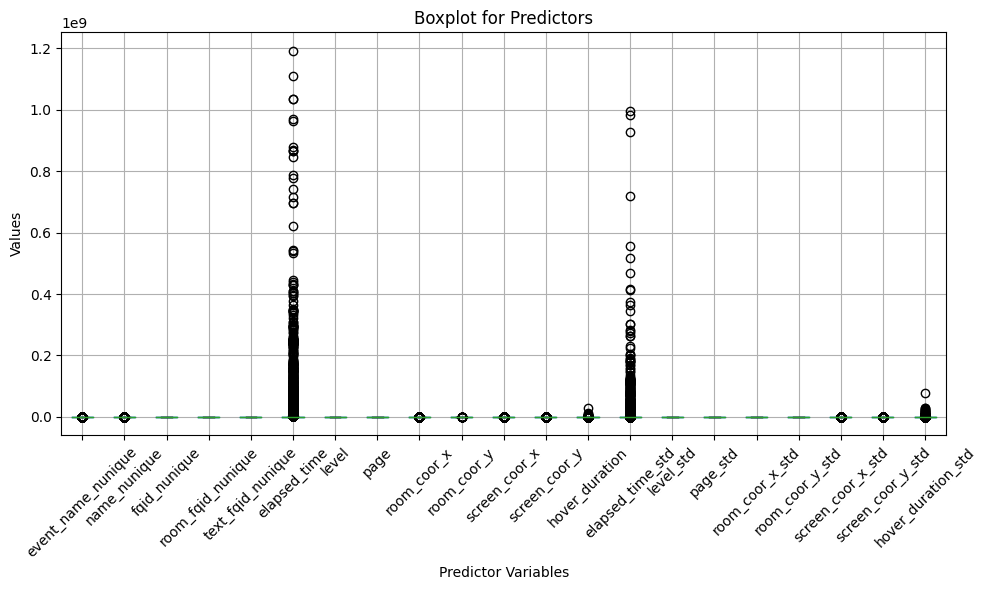

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the predictor columns from the train dataset
predictor_columns = train_x.columns

# Create a boxplot for each predictor column
plt.figure(figsize=(10, 6))
train_x[predictor_columns].boxplot(rot=45, showfliers=True)
plt.title('Boxplot for Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [33]:
valid_x.index

Int64Index([22000320020067784, 22000320020067784, 22000320020067784,
            22000321083750010, 22000321083750010, 22000321083750010,
            22000401381351532, 22000401381351532, 22000401381351532,
            22000407142860316,
            ...
            22100215460321130, 22100217104993650, 22100217104993650,
            22100217104993650, 22100219442786200, 22100219442786200,
            22100219442786200, 22100221145014656, 22100221145014656,
            22100221145014656],
           dtype='int64', name='session_id', length=14139)

In [34]:
valid_x.index.nunique()

4713

In [35]:
VALID_USER_LIST = valid_x.index.unique()

We will train a model for each question to predict if the question will be answered correctly by a user. There are a total of 18 questions in the dataset. Hence, we will be training 18 models, one for each question.

We need to provide a few data structures to our training loop to store the trained models, predictions on the validation set and evaluation scores for the trained models.

Before training the data, it is important to understand the relationship between the level groups and questions. In this game, there is a specific pattern where certain questions are associated with specific level groups.

To train the models for each question, we will follow the following association:

- Questions 1 to 3 are associated with level groups 0 to 4.
- Questions 4 to 13 are associated with level groups 5 to 12.
- Questions 14 to 18 are associated with level groups 13 to 22.

For each question, we will train a separate model and store it in the `models` dictionary.

By training separate models for each question and associating them with the appropriate level groups, we can capture the specific patterns and relationships between the questions and the corresponding gameplay levels. This allows us to make more accurate predictions and analyze the performance of each question individually.

In [36]:
# Create an empty dictionary to store the models created for each question.
models = {}

# Create an empty dictionary to store the evaluation accuracy for each question.
evaluation_dict = {}

# Create a dataframe for storing the predictions of each question for all users in the validation set.
# The dataframe's index column is the user `session_id`s.

prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Iterate through questions 1 to 18 to train models for each question, evaluate the trained model, and store the predicted values.
for q_no in range(1, 19):
    # Select level group for the question based on the q_no.
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    elif q_no <= 22:
        grp = '13-22'
    print("### q_no", q_no, "grp", grp)

    # Filter the rows in the datasets based on the selected level group.
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values #session ids
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Select the labels for the related q_no. 
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    # Add the label to the filtered datasets.
    train_df["correct"] = train_labels["correct"] 
    valid_df["correct"] = valid_labels["correct"]

    # Convert the filtered datasets into TensorFlow Datasets format.
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df.loc[:, train_df.columns != 'level_group'], label="correct")
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df.loc[:, valid_df.columns != 'level_group'], label="correct")

    # Create a Gradient Boosted Trees Model with default settings.
    gbtm = tfdf.keras.GradientBoostedTreesModel(verbose=0)
    gbtm.compile(metrics=["accuracy"])

    # Train the model.
    gbtm.fit(x=train_ds)

    # Store the model in the `models` dictionary.
    models[f'{grp}_{q_no}'] = gbtm

    # Evaluate the trained model on the validation dataset.
    evaluation = gbtm.evaluate(x=valid_ds, return_dict=True)
    evaluation_dict[q_no] = evaluation["accuracy"]

    # Use the trained model to make predictions on the validation dataset.
    # Use the trained model to make predictions on the validation dataset.

    predict = gbtm.predict(x=valid_ds)
    prediction_df.loc[valid_users, q_no - 1] = predict.flatten()


### q_no 1 grp 0-4


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autogra

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 16ms/step
### q_no 2 grp 0-4


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 13ms/step
### q_no 3 grp 0-4


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9351


5/5 [==============================] - 0s 12ms/step
### q_no 4 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.7957


5/5 [==============================] - 0s 14ms/step


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


### q_no 5 grp 5-12


5/5 [==============================] - 0s 14ms/step
### q_no 6 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 26ms/step
### q_no 7 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 13ms/step
### q_no 8 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 15ms/step
### q_no 9 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 14ms/step
### q_no 10 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 14ms/step
### q_no 11 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 14ms/step
### q_no 12 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 15ms/step
### q_no 13 grp 5-12


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 18ms/step
### q_no 14 grp 13-22


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 16ms/step
### q_no 15 grp 13-22


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 25ms/step
### q_no 16 grp 13-22


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 13ms/step
### q_no 17 grp 13-22


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 16ms/step
### q_no 18 grp 13-22


<ipython-input-36-9c01ea497bc7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
<ipython-input-36-9c01ea497bc7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


5/5 [==============================] - 0s 15ms/step


In [37]:
inspector = models['5-12_10'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [38]:
# Iterate over the evaluation_dict to print the accuracy for each question
for q_no, accuracy in evaluation_dict.items():
    print("Question {}: Accuracy = {:.2f}%".format(q_no, accuracy * 100))


Question 1: Accuracy = 72.86%
Question 2: Accuracy = 97.43%
Question 3: Accuracy = 93.51%
Question 4: Accuracy = 79.57%
Question 5: Accuracy = 63.19%
Question 6: Accuracy = 78.85%
Question 7: Accuracy = 74.56%
Question 8: Accuracy = 63.55%
Question 9: Accuracy = 76.32%
Question 10: Accuracy = 61.09%
Question 11: Accuracy = 65.22%
Question 12: Accuracy = 86.95%
Question 13: Accuracy = 72.18%
Question 14: Accuracy = 73.37%
Question 15: Accuracy = 61.66%
Question 16: Accuracy = 74.86%
Question 17: Accuracy = 70.27%
Question 18: Accuracy = 95.10%


Question 1: Accuracy = 72.86%
Question 2: Accuracy = 97.43%
Question 3: Accuracy = 93.51%
Question 4: Accuracy = 79.57%
Question 5: Accuracy = 63.19%
Question 6: Accuracy = 78.85%
Question 7: Accuracy = 74.56%
Question 8: Accuracy = 63.55%
Question 9: Accuracy = 76.32%
Question 10: Accuracy = 61.09%
Question 11: Accuracy = 65.22%
Question 12: Accuracy = 86.95%
Question 13: Accuracy = 72.18%
Question 14: Accuracy = 73.37%
Question 15: Accuracy = 61.66%
Question 16: Accuracy = 74.86%
Question 17: Accuracy = 70.27%
Question 18: Accuracy = 95.10%


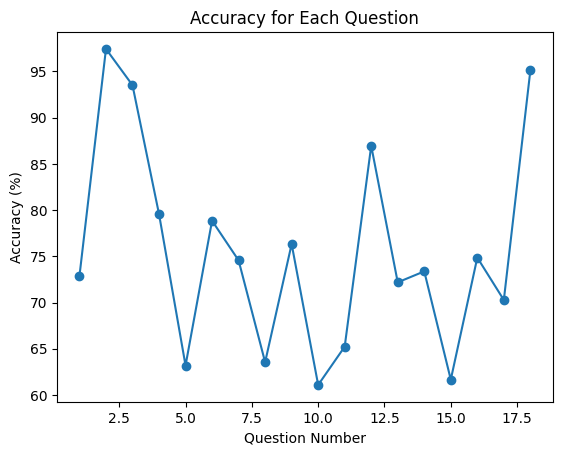

In [41]:
import matplotlib.pyplot as plt

# Iterate over the evaluation_dict to store the accuracy for each question
question_numbers = []
accuracies = []
for q_no, accuracy in evaluation_dict.items():
    question_numbers.append(q_no)
    accuracies.append(accuracy * 100)
    print("Question {}: Accuracy = {:.2f}%".format(q_no, accuracy * 100))

# Plot the accuracies
plt.figure()
plt.plot(question_numbers, accuracies, marker='o')
plt.xlabel('Question Number')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Question')
plt.show()


Question 1: Accuracy = 72.86%
Question 2: Accuracy = 97.43%
Question 3: Accuracy = 93.51%
Question 4: Accuracy = 79.57%
Question 5: Accuracy = 63.19%
Question 6: Accuracy = 78.85%
Question 7: Accuracy = 74.56%
Question 8: Accuracy = 63.55%
Question 9: Accuracy = 76.32%
Question 10: Accuracy = 61.09%
Question 11: Accuracy = 65.22%
Question 12: Accuracy = 86.95%
Question 13: Accuracy = 72.18%
Question 14: Accuracy = 73.37%
Question 15: Accuracy = 61.66%
Question 16: Accuracy = 74.86%
Question 17: Accuracy = 70.27%
Question 18: Accuracy = 95.10%


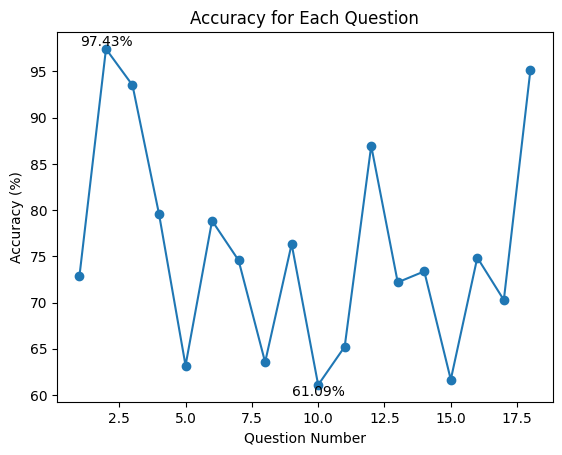

In [43]:
import matplotlib.pyplot as plt

# Iterate over the evaluation_dict to store the accuracy for each question
question_numbers = []
accuracies = []
for q_no, accuracy in evaluation_dict.items():
    question_numbers.append(q_no)
    accuracies.append(accuracy * 100)
    print("Question {}: Accuracy = {:.2f}%".format(q_no, accuracy * 100))

# Plot the accuracies
plt.figure()
plt.plot(question_numbers, accuracies, marker='o')
plt.xlabel('Question Number')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Question')

# Find the extreme values
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)

# Display extreme values on the plot
plt.text(question_numbers[accuracies.index(max_accuracy)], max_accuracy, "{:.2f}%".format(max_accuracy), ha='center', va='bottom')
plt.text(question_numbers[accuracies.index(min_accuracy)], min_accuracy, "{:.2f}%".format(min_accuracy), ha='center', va='top')

plt.show()


F1 Score for Question 1: 0.9644233946469876
F1 Score for Question 2: 0.9749782419495213
F1 Score for Question 3: 0.974989125706829
F1 Score for Question 4: 0.9640017667844524
F1 Score for Question 5: 0.8132833699444372
F1 Score for Question 6: 0.9640017667844524
F1 Score for Question 7: 0.969058591178407
F1 Score for Question 8: 0.9650688705234161
F1 Score for Question 9: 0.9612609612609613
F1 Score for Question 10: 0.7289667640105687
F1 Score for Question 11: 0.945823927765237
F1 Score for Question 12: 0.9750843216189752
F1 Score for Question 13: 0.0795551753635586
F1 Score for Question 14: 0.9584956047624346
F1 Score for Question 15: 0.6773442050087362
F1 Score for Question 16: 0.9747606614447346
F1 Score for Question 17: 0.9743199129488576
F1 Score for Question 18: 0.9748776508972269


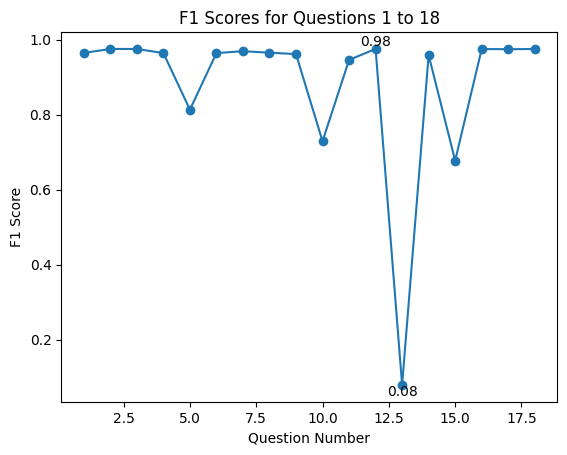

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Initialize a list to store the F1 scores
f1_scores = []

# Iterate through questions 1 to 18
for q_no in range(1, 19):

    # Retrieve the predicted values and true labels for the current question
    predicted_values = prediction_df[q_no - 1].values
    true_labels = valid_labels.loc[:, 'correct'].values

    # Convert predicted values to binary
    predicted_values_binary = (predicted_values > 0.5).astype(int)

    # Calculate the F1 score
    f1 = f1_score(true_labels, predicted_values_binary)

    # Append the F1 score to the list
    f1_scores.append(f1)

    # Print the F1 score
    print(f"F1 Score for Question {q_no}: {f1}")

# Plot the F1 scores
plt.figure()
plt.plot(range(1, 19), f1_scores, marker='o')
plt.xlabel('Question Number')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Questions 1 to 18')

# Find the extreme values
max_f1 = max(f1_scores)
min_f1 = min(f1_scores)

# Display extreme values on the plot
plt.text(f1_scores.index(max_f1) + 1, max_f1, "{:.2f}".format(max_f1), ha='center', va='bottom')
plt.text(f1_scores.index(min_f1) + 1, min_f1, "{:.2f}".format(min_f1), ha='center', va='top')

plt.show()


Please note: accuracy may not be a suitable measure when dealing with imbalanced labels. In such cases, other evaluation metrics can provide a more comprehensive assessment of the model's performance. Here are a few alternatives you can consider:

1. Confusion Matrix: A confusion matrix provides a breakdown of true positive, true negative, false positive, and false negative predictions. It helps in understanding the model's performance across different classes and can be used to calculate various metrics like precision, recall, and F1 score.

2. Precision and Recall: Precision (also known as positive predictive value) measures the proportion of correctly predicted positive instances out of all predicted positive instances. Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive instances out of all actual positive instances. These metrics are useful when the focus is on the performance of a specific class.

3. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall and is especially useful when the class distribution is imbalanced.

4. Area Under the Receiver Operating Characteristic Curve (AUC-ROC): AUC-ROC measures the model's ability to distinguish between positive and negative instances across various thresholds. It is suitable for binary classification problems and provides an aggregated measure of the model's performance.

5. Balanced Accuracy: Balanced accuracy takes into account class imbalance by calculating the average of sensitivity (recall) for each class. It provides a more balanced evaluation metric when class distribution is skewed.

When dealing with imbalanced labels, it's important to choose evaluation metrics that align with the problem and the specific goals of the analysis. It may also be beneficial to explore additional techniques such as resampling methods (e.g., oversampling or undersampling) or using advanced algorithms designed for imbalanced data, such as weighted or cost-sensitive models.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Iterate through questions 1 to 18
for q_no in range(1, 19):

    # Retrieve the predicted values and true labels for the current question
    predicted_values = prediction_df[q_no - 1].values
    true_labels = valid_labels.loc[:, 'correct'].values

    # Convert predicted values to binary
    predicted_values_binary = (predicted_values > 0.5).astype(int)

    # Calculate and print the confusion matrix
    cm = confusion_matrix(true_labels, predicted_values_binary)
    print(f"Confusion Matrix for Question {q_no}:\n{cm}\n")

    # Calculate and print the precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_values_binary)
    recall = recall_score(true_labels, predicted_values_binary)
    f1 = f1_score(true_labels, predicted_values_binary)
    print(f"Precision for Question {q_no}: {precision}")
    print(f"Recall for Question {q_no}: {recall}")
    print(f"F1 Score for Question {q_no}: {f1}\n")

    # Calculate and print the AUC-ROC score
    auc_roc = roc_auc_score(true_labels, predicted_values)
    print(f"AUC-ROC Score for Question {q_no}: {auc_roc}\n")

    # Calculate and print the balanced accuracy
    balanced_acc = balanced_accuracy_score(true_labels, predicted_values_binary)
    print(f"Balanced Accuracy for Question {q_no}: {balanced_acc}\n")


Confusion Matrix for Question 1:
[[  12  216]
 [ 107 4378]]

Precision for Question 1: 0.9529821506312581
Recall for Question 1: 0.9761426978818283
F1 Score for Question 1: 0.9644233946469876

AUC-ROC Score for Question 1: 0.5790989458037512

Balanced Accuracy for Question 1: 0.5143871384145984

Confusion Matrix for Question 2:
[[   2  226]
 [   4 4481]]

Precision for Question 2: 0.951986403229233
Recall for Question 2: 0.999108138238573
F1 Score for Question 2: 0.9749782419495213

AUC-ROC Score for Question 2: 0.5519621936669992

Balanced Accuracy for Question 2: 0.5039400340315672

Confusion Matrix for Question 3:
[[   0  228]
 [   2 4483]]

Precision for Question 3: 0.9516026321375504
Recall for Question 3: 0.9995540691192865
F1 Score for Question 3: 0.974989125706829

AUC-ROC Score for Question 3: 0.5417096950849811

Balanced Accuracy for Question 3: 0.49977703455964323

Confusion Matrix for Question 4:
[[  22  206]
 [ 120 4365]]

Precision for Question 4: 0.9549332749945307
Recal

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Initialize variables to store aggregated metrics
overall_cm = None
overall_precision = 0.0
overall_recall = 0.0
overall_f1 = 0.0
overall_auc_roc = 0.0
overall_balanced_acc = 0.0

# Iterate through questions 1 to 18
for q_no in range(1, 19):

    # Retrieve the predicted values and true labels for the current question
    predicted_values = prediction_df[q_no - 1].values
    true_labels = valid_labels.loc[:, 'correct'].values

    # Convert predicted values to binary
    predicted_values_binary = (predicted_values > 0.5).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_values_binary)
    overall_cm = cm if overall_cm is None else overall_cm + cm

    # Calculate the precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_values_binary)
    recall = recall_score(true_labels, predicted_values_binary)
    f1 = f1_score(true_labels, predicted_values_binary)

    # Aggregate the metrics
    overall_precision += precision
    overall_recall += recall
    overall_f1 += f1

    # Calculate and print the AUC-ROC score
    auc_roc = roc_auc_score(true_labels, predicted_values)
    overall_auc_roc += auc_roc

    # Calculate and print the balanced accuracy
    balanced_acc = balanced_accuracy_score(true_labels, predicted_values_binary)
    overall_balanced_acc += balanced_acc

# Print the overall confusion matrix
print(f"Overall Confusion Matrix:\n{overall_cm}\n")

# Calculate the overall metrics
n_questions = 18
overall_precision /= n_questions
overall_recall /= n_questions
overall_f1 /= n_questions
overall_auc_roc /= n_questions
overall_balanced_acc /= n_questions

# Print the overall metrics
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1 Score: {overall_f1}")
print(f"Overall AUC-ROC Score: {overall_auc_roc}")
print(f"Overall Balanced Accuracy: {overall_balanced_acc}")


Overall Confusion Matrix:
[[  862  3242]
 [10836 69894]]

Overall Precision: 0.9577042207394268
Overall Recall: 0.8657748049052396
Overall F1 Score: 0.8800163506999887
Overall AUC-ROC Score: 0.6384546115381355
Overall Balanced Accuracy: 0.5379068956300077


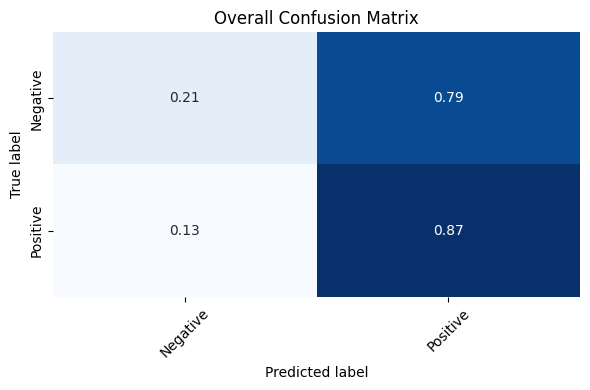

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the normalized confusion matrix
overall_cm_normalized = overall_cm.astype('float') / overall_cm.sum(axis=1)[:, np.newaxis]

# Define the class labels
class_labels = ['Negative', 'Positive']  # Update with your specific class labels

# Create a figure and axis
plt.figure(figsize=(6, 4))
ax = plt.subplot()

# Create the heatmap
sns.heatmap(overall_cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Overall Confusion Matrix')

# Set x-axis tick labels
ax.xaxis.set_ticklabels(class_labels)
# Set y-axis tick labels
ax.yaxis.set_ticklabels(class_labels)

# Rotate tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
tfdf.model_plotter.plot_model_in_colab(models['13-22_18'], tree_idx=0, max_depth=3)


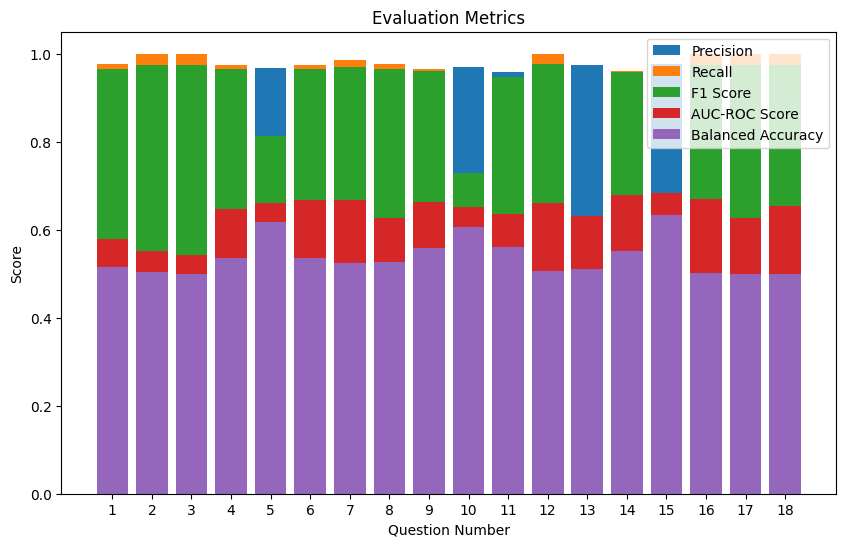

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Lists to store the evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
balanced_acc_scores = []

# Iterate through questions 1 to 18
for q_no in range(1, 19):
    # Retrieve the predicted values and true labels for the current question
    predicted_values = prediction_df[q_no - 1].values
    true_labels = valid_labels.loc[:, 'correct'].values

    # Convert predicted values to binary
    predicted_values_binary = (predicted_values > 0.5).astype(int)

    # Calculate and print the confusion matrix
    cm = confusion_matrix(true_labels, predicted_values_binary)
  
    # Calculate and print the precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_values_binary)
    recall = recall_score(true_labels, predicted_values_binary)
    f1 = f1_score(true_labels, predicted_values_binary)
 
    # Calculate and print the AUC-ROC score
    auc_roc = roc_auc_score(true_labels, predicted_values)
  

    # Calculate and print the balanced accuracy
    balanced_acc = balanced_accuracy_score(true_labels, predicted_values_binary)
   
 
    # ... (previous code to calculate evaluation metrics)
    # Retrieve the predicted values and true labels for the current question
    predicted_values = prediction_df[q_no - 1].values
    true_labels = valid_labels.loc[:, 'correct'].values

    # Convert predicted values to binary
    predicted_values_binary = (predicted_values > 0.5).astype(int)

    # Calculate and print the confusion matrix
    cm = confusion_matrix(true_labels, predicted_values_binary)
   

    # Calculate and print the precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_values_binary)
    recall = recall_score(true_labels, predicted_values_binary)
    f1_score_value = f1_score(true_labels, predicted_values_binary)
    

    # Calculate and print the AUC-ROC score
    auc_roc = roc_auc_score(true_labels, predicted_values)
    

    # Calculate and print the balanced accuracy
    balanced_acc = balanced_accuracy_score(true_labels, predicted_values_binary)
  
    # Append the evaluation scores to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score_value)
    auc_roc_scores.append(auc_roc)
    balanced_acc_scores.append(balanced_acc)
        # Add the metrics to the dataframe

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the evaluation metrics
ax.bar(range(1, 19), precision_scores, label='Precision')
ax.bar(range(1, 19), recall_scores, label='Recall')
ax.bar(range(1, 19), f1_scores, label='F1 Score')
ax.bar(range(1, 19), auc_roc_scores, label='AUC-ROC Score')
ax.bar(range(1, 19), balanced_acc_scores, label='Balanced Accuracy')

# Set the axis labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics')

# Set the x-axis tick labels
ax.set_xticks(range(1, 19))

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Predicitons on test.csv

In [ ]:
test

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,8


In [ ]:
test = feature_engineer(test)

In [ ]:
test

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090109393214576,0-4,11,4,24,6,13,1.171198e+05,2.050000,0.500000,39.449107,...,374.597015,2006.800000,6.661989e+04,1.348194,0.577350,440.144543,145.126812,253.078561,109.499210,2341.772128
20090109393214576,13-22,11,4,52,12,35,6.165666e+06,17.918089,4.843750,-124.577142,...,393.667883,973.864865,2.277512e+05,2.279627,0.723316,629.713345,274.696739,234.320165,122.118739,1462.983181
20090109393214576,5-12,11,4,43,12,23,2.092368e+06,7.686567,1.888889,48.260390,...,363.129707,2301.315789,2.124842e+06,1.898028,0.758395,378.100318,136.966952,241.109236,118.302246,4092.914793
20090312143683264,0-4,11,4,27,7,15,1.424183e+05,1.803681,0.000000,91.577137,...,413.104575,3066.555556,7.825763e+04,1.221509,0.000000,440.053605,177.281060,233.244085,139.175966,5097.845209
20090312143683264,13-22,11,6,55,15,38,2.195108e+06,17.335626,4.833333,-21.133174,...,415.654303,864.096154,3.078757e+05,2.688642,1.147211,576.561514,256.058964,250.247781,137.832060,1755.180693
20090312143683264,5-12,11,4,56,13,28,7.911504e+05,8.445172,1.565217,42.823079,...,391.784787,1379.492958,2.456884e+05,2.303566,0.787752,414.653052,170.659545,244.272072,147.151081,2012.309284
20090312331414616,0-4,11,4,23,6,13,1.128328e+05,1.861538,0.000000,67.333464,...,374.118644,2176.818182,6.100448e+04,1.159750,0.000000,431.739627,205.922771,230.848314,149.588791,3449.709374
20090312331414616,13-22,11,4,62,13,34,1.262481e+06,18.332689,5.545455,-93.299934,...,407.912473,794.542373,1.934719e+05,2.731803,0.670982,575.032012,236.920471,259.182135,132.653160,1057.100513
20090312331414616,5-12,11,4,46,11,21,5.585205e+05,8.459119,2.250000,8.512538,...,389.124528,1561.096154,1.366002e+05,2.121669,0.753778,357.487622,145.548413,221.973510,129.969153,3148.359406


In [ ]:
TEST_USER_LIST = test.index.unique()

In [ ]:
# Create an empty DataFrame to store the predictions of each question for all users in the test dataset
test_prediction_df = pd.DataFrame(data=np.zeros((len(TEST_USER_LIST), 18)), index=TEST_USER_LIST)

# Iterate through questions 1 to 18 to make predictions on the test dataset
for q_no in range(1, 19):
    # Select level group for the question based on the q_no
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    elif q_no <= 22:
        grp = '13-22'
    print("### q_no", q_no, "grp", grp)

    # Filter the rows in the test dataset based on the selected level group
    test_df = test.loc[test.level_group == grp]
    test_users = test_df.index.values

    # Convert the filtered test dataset into a TensorFlow Dataset format
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df.loc[:, test_df.columns != 'level_group'])

    # Use the trained model to make predictions on the test dataset
    model = models[f'{grp}_{q_no}']
  
    predict = model.predict(x=test_ds)
    test_prediction_df.loc[test_users, q_no - 1] = predict.flatten()

# Print the predictions for the test dataset
print(test_prediction_df)


### q_no 1 grp 0-4
1/1 [==============================] - 0s 61ms/step
### q_no 2 grp 0-4
1/1 [==============================] - 0s 59ms/step
### q_no 3 grp 0-4
1/1 [==============================] - 0s 62ms/step
### q_no 4 grp 5-12
1/1 [==============================] - 0s 68ms/step
### q_no 5 grp 5-12
1/1 [==============================] - 0s 71ms/step
### q_no 6 grp 5-12
1/1 [==============================] - 0s 63ms/step
### q_no 7 grp 5-12
1/1 [==============================] - 0s 64ms/step
### q_no 8 grp 5-12
1/1 [==============================] - 0s 60ms/step
### q_no 9 grp 5-12
1/1 [==============================] - 0s 64ms/step
### q_no 10 grp 5-12
1/1 [==============================] - 0s 59ms/step
### q_no 11 grp 5-12
1/1 [==============================] - 0s 71ms/step
### q_no 12 grp 5-12
1/1 [==============================] - 0s 67ms/step
### q_no 13 grp 5-12
1/1 [==============================] - 0s 61ms/step
### q_no 14 grp 13-22
1/1 [==============================] - 0s

In [ ]:
test_prediction_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090109393214576,0.726163,0.985642,0.942727,0.844799,0.537417,0.851650,0.777376,0.602914,0.788584,0.442928,0.618983,0.905662,0.304553,0.763801,0.522474,0.717023,0.639560,0.979525
20090312143683264,0.684744,0.986610,0.929924,0.579668,0.255703,0.463028,0.526615,0.541353,0.466491,0.357723,0.443900,0.789235,0.099195,0.641807,0.314938,0.709363,0.621493,0.897296
20090312331414616,0.736109,0.986519,0.930473,0.843690,0.574485,0.805756,0.764439,0.618027,0.731503,0.451322,0.688629,0.891940,0.215533,0.748330,0.449171,0.720739,0.691040,0.944761
